In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

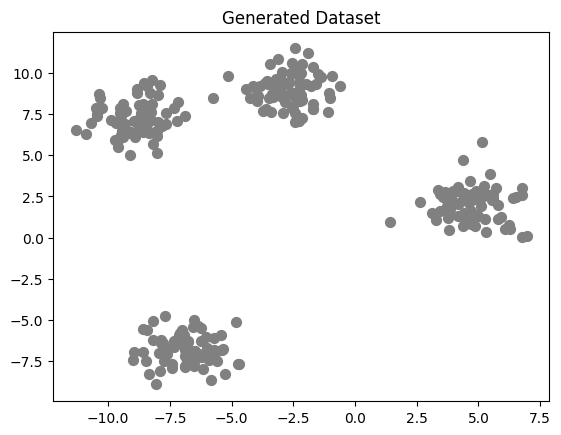

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray')
plt.title('Generated Dataset')
plt.show()

In [ ]:
class KMeans:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None

    def initialize_centroids(self, X):
        np.random.seed(42)
        random_indices = np.random.permutation(X.shape[0])
        centroids = X[random_indices[:self.k]]
        return centroids

    def assign_clusters(self, X, centroids):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
        return new_centroids

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)

        for i in range(self.max_iters):
            labels = self.assign_clusters(X, self.centroids)
            new_centroids = self.update_centroids(X, labels)

            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

        return self.centroids, labels

    def inertia(self, X, labels):
        return np.sum((X - self.centroids[labels]) ** 2)

In [ ]:
kmeans = KMeans(k=4)
initial_centroids = kmeans.initialize_centroids(X)
centroids, labels = kmeans.fit(X)

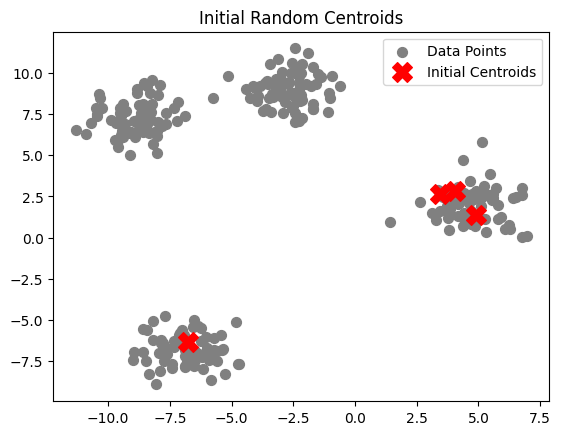

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', label='Data Points')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], s=200, c='red', marker='X', label='Initial Centroids')
plt.title('Initial Random Centroids')
plt.legend()
plt.show()

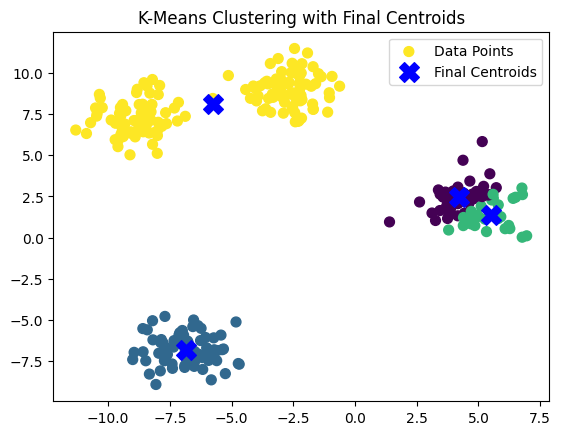

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='blue', marker='X', label='Final Centroids')
plt.title('K-Means Clustering with Final Centroids')
plt.legend()
plt.show()

In [ ]:
inertia_values = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(k=k)
    centroids, labels = kmeans.fit(X)
    inertia = kmeans.inertia(X, labels)
    inertia_values.append(inertia)

<ipython-input-11-b7ed2a397fa3>:21: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])


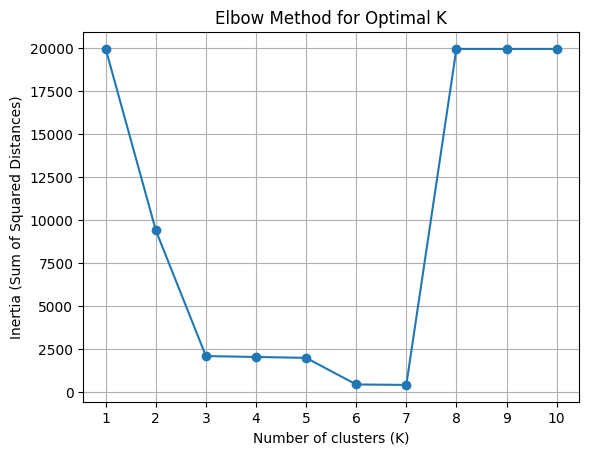

In [ ]:
plt.plot(K_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(K_values)
plt.grid()
plt.show()

In [ ]:
for k, inertia in zip(K_values, inertia_values):
    print(f"K = {k}, Inertia = {inertia:.2f}")

K = 1, Inertia = 19953.77
K = 2, Inertia = 9416.21
K = 3, Inertia = 2110.41
K = 4, Inertia = 2058.54
K = 5, Inertia = 2007.60
K = 6, Inertia = 461.71
K = 7, Inertia = 434.73
K = 8, Inertia = 19953.77
K = 9, Inertia = 19953.77
K = 10, Inertia = 19953.77


In [ ]:
optimal_k = K_values[np.argmin(inertia_values)]
print(f"The optimal K is: {optimal_k}")

The optimal K is: 7


In [ ]:
kmeans_optimal = KMeans(k=optimal_k)
centroids_optimal, labels_optimal = kmeans_optimal.fit(X)

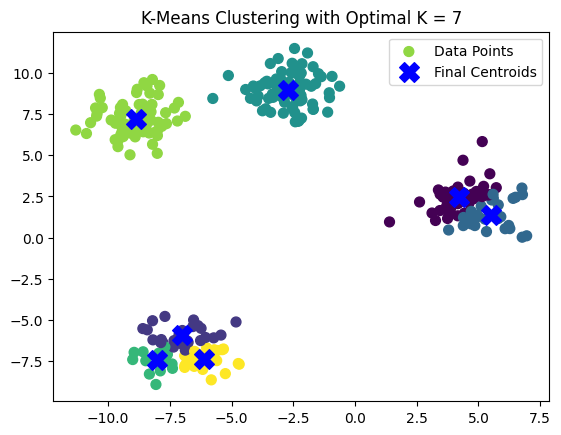

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels_optimal, s=50, cmap='viridis', label='Data Points')
plt.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], s=200, c='blue', marker='X', label='Final Centroids')
plt.title(f'K-Means Clustering with Optimal K = {optimal_k}')
plt.legend()
plt.show()